# MaxCut QAOA

In [28]:
# run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [29]:
import matplotlib.pyplot as pl
import networkx as nx
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit_aer import QasmSimulator

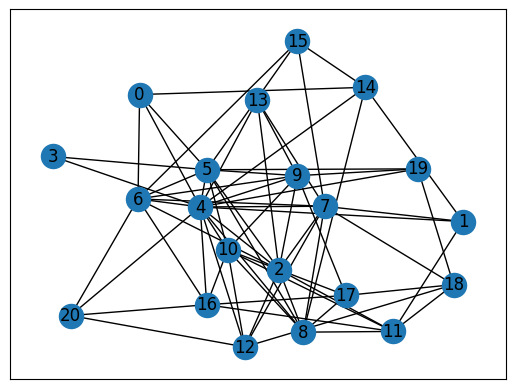

In [30]:
numV = 21
G = nx.read_gml("w_ba_n" + str(numV) + "_k4_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos)

In [31]:
params = {"G": G}
qaoamc = QAOAMaxCut(params=params)

In [32]:
qasm_sim = QasmSimulator()

In [33]:
qaoamc.sample_cost_landscape(angles={"gamma": [0, np.pi / 2, 5], "beta": [0, np.pi, 5]})

Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done


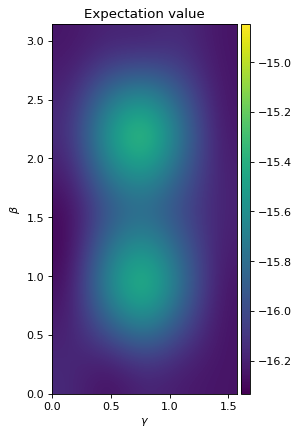

In [34]:
f = pl.figure(figsize=(6, 6), dpi=80, facecolor="w", edgecolor="k")
_ = pl.xlabel(r"$\gamma$")
_ = pl.ylabel(r"$\beta$")
ax = pl.gca()
_ = pl.title("Expectation value")
im = ax.imshow(
    qaoamc.E, interpolation="bicubic", origin="lower", extent=[0, np.pi / 2, 0, np.pi]
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = pl.colorbar(im, cax=cax)

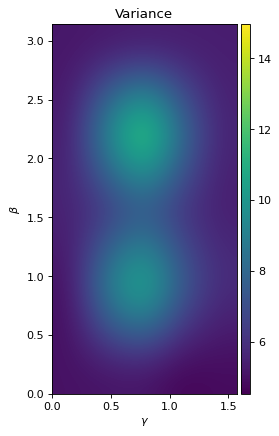

In [35]:
f = pl.figure(figsize=(6, 6), dpi=80, facecolor="w", edgecolor="k")
_ = pl.xlabel(r"$\gamma$")
_ = pl.ylabel(r"$\beta$")
ax = pl.gca()
_ = pl.title("Variance")
im = ax.imshow(
    qaoamc.Var, interpolation="bicubic", origin="lower", extent=[0, np.pi / 2, 0, np.pi]
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = pl.colorbar(im, cax=cax)

In [36]:
maxdepth = 1
for i in range(maxdepth):
    qaoamc.increase_depth()

cost(depth= 1 )= -19.701969811320566


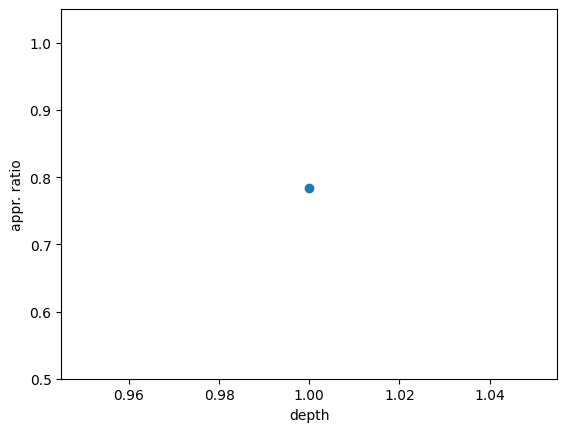

In [37]:
mincost = -25.23404480588015
pl.plot(
    np.arange(1, maxdepth + 1), np.array(list(qaoamc.costval.values())) / mincost, "o--"
)
pl.hlines(1, 1, maxdepth, linestyles="solid", colors="black")
pl.ylim(0.5, 1.05)
_ = pl.ylabel("appr. ratio")
_ = pl.xlabel("depth")

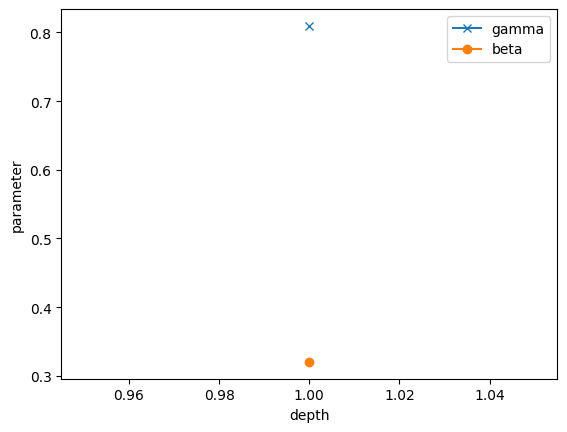

In [38]:
pl.plot(
    np.arange(1, maxdepth + 1),
    qaoamc.angles_hist["d" + str(maxdepth) + "_final"][::2],
    "x-",
    label="gamma",
)
pl.plot(
    np.arange(1, maxdepth + 1),
    qaoamc.angles_hist["d" + str(maxdepth) + "_final"][1::2],
    "o-",
    label="beta",
)
_ = pl.ylabel("parameter")
_ = pl.xlabel("depth")
_ = pl.legend()

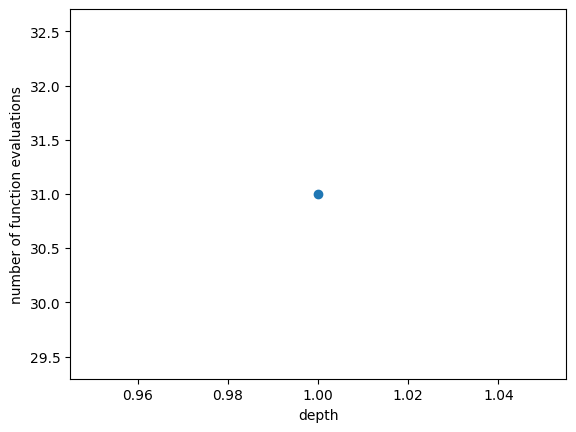

In [39]:
_ = pl.plot(np.arange(1, maxdepth + 1), qaoamc.num_fval.values(), "o-")
_ = pl.ylabel("number of function evaluations")
_ = pl.xlabel("depth")

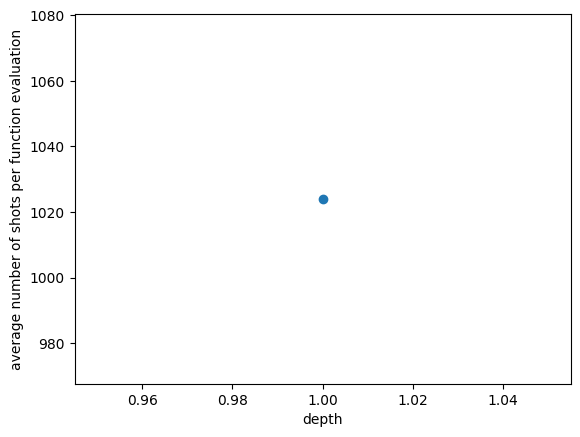

In [40]:
_ = pl.plot(
    np.arange(1, maxdepth + 1),
    np.array(list(qaoamc.num_shots.values())) / np.array(list(qaoamc.num_fval.values())),
    "o-",
)
_ = pl.ylabel("average number of shots per function evaluation")
_ = pl.xlabel("depth")